## Importações

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, mean_squared_error, recall_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.utils import resample
from imblearn.over_sampling import RandomOverSampler
from scipy.stats import ks_2samp
import seaborn as sns
import torch
from kan import KAN

In [107]:
df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## Pré-processamento de dados e análise exploratória

### Processamento do conjunto de treinamento

In [108]:
df.shape

(103904, 25)

O dataset possui 25 colunas de variáveis e 103904 linhas

In [109]:
df.dtypes

Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

Podemos observar que o conjunto de dados contém uma coluna "Unnamed: 0" que está contabilizando a quantidade de registros da tabela. Também é possível notar que contém uma coluna "id". Nenhuma das duas colunas será relevante para a análise de dados e treinamento dos modelos deste exercício e serão elimitadas do dataframe.

In [110]:
df = df.drop(columns=['Unnamed: 0', 'id'])

A seguir, aplicamos a função `drop_duplicates` no nosso dataframe para remover registros duplicados. Após a aplicação da função podemos notar que o formato dos dados permanece igual a antes, ou seja, não há registros duplicados nesta amostra.

In [111]:
df.drop_duplicates()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,Female,disloyal Customer,23,Business travel,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,Male,Loyal Customer,49,Business travel,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,Male,disloyal Customer,30,Business travel,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,Female,disloyal Customer,22,Business travel,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


In [112]:
df.isnull().values.any()

True

A avaliação de valores nulos retornou positiva e será feito o tratemento destes valores nulos da seguinte forma:

In [113]:
df = df.fillna(method ='pad')

/var/folders/qs/_360zg2933b7jcgcm4bjkqn00000gq/T/ipykernel_54870/1699709344.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method ='pad')


Esse método é fornecido pela biblioteca pandas e substitui os valores nulos pelo valor desta coluna no registro anterior. Após executar essa transformação, a função `isnull` retorna `false`, confirmando que nossa substituição dos valores nulos foi efetiva.

In [114]:
df.isnull().values.any()

False

A seguir, verificaremos a distribuição das classes de satisfação dos passageiros entre 'neutral or dissatisfied' e 'satisfied'. Através do gráfico podemos observar que o conjunto de dados de treinamento é levemente desbalanceado.

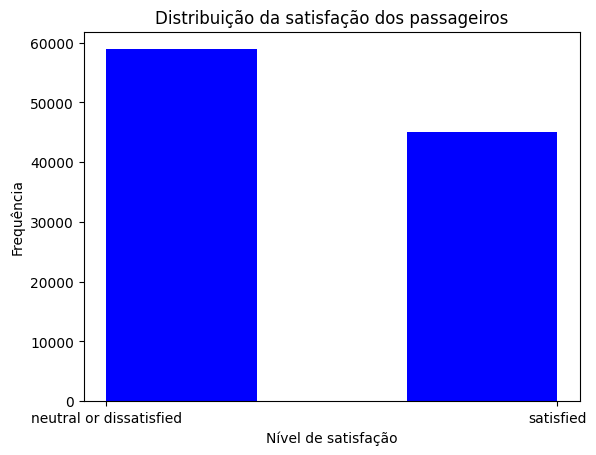

In [115]:
# Create a histogram
plt.hist(df['satisfaction'], bins=3, color='blue')

# Add titles and labels
plt.title('Distribuição da satisfação dos passageiros')
plt.xlabel('Nível de satisfação')
plt.ylabel('Frequência')

# Show the plot
plt.show()

In [116]:
class_0_length = df[df['satisfaction'] == 'neutral or dissatisfied'].shape[0]
class_1_length = df[df['satisfaction'] == 'satisfied'].shape[0]
print(class_0_length)
print(class_1_length)
print("Diferença de quantidade de amostra entre as classes: {}".format(class_0_length - class_1_length))

58879
45025
Diferença de quantidade de amostra entre as classes: 13854


**Oversampling**

In [117]:
class_0 = df[df['satisfaction'] == 'neutral or dissatisfied']
class_1 = df[df['satisfaction'] == 'satisfied']

In [118]:
class_1_oversampled = resample(class_1,
                                   replace=True,  # Sample with replacement
                                   n_samples=class_0_length,  # Match number of samples in class 0
                                   random_state=42)  # Seed for reproducibility

# Combine oversampled class 1 with class 0
df = pd.concat([class_0, class_1_oversampled])

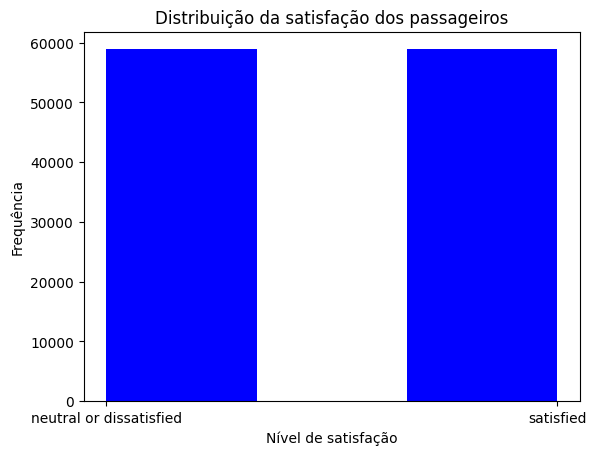

In [119]:
#Histogram after oversample
plt.hist(df['satisfaction'], bins=3, color='blue')

# Add titles and labels
plt.title('Distribuição da satisfação dos passageiros')
plt.xlabel('Nível de satisfação')
plt.ylabel('Frequência')

# Show the plot
plt.show()

Também foi identificada a coluna de inteiros "Age". O tratamento dado para esta coluna será representá-la por meio de variávels categóricas que englobam ranges de idades, desta forma obtendo análises mais significativas sobre a amostra.

In [120]:
bins = [0, 18, 30, 45, 60, 100]
labels = ['0-18', '19-30', '31-45', '46-60', '61+']

df['age_range'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [121]:
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,age_range
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,0-18
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,19-30
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,19-30
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,3,4,4,4,4,1,0,0.0,neutral or dissatisfied,19-30
6,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,...,3,3,4,3,5,2,9,23.0,neutral or dissatisfied,46-60


A mesma análise pode ser feita para a coluna de 'Flight Distance'; A informação de distância de um vôo é uma variável contínua e não é muito significativa se mantivermos no seu formato original. </br> Desta forma, as distâncias de vôo foram convertidas em categorias que englobam um determinado _range_ de distâncias.

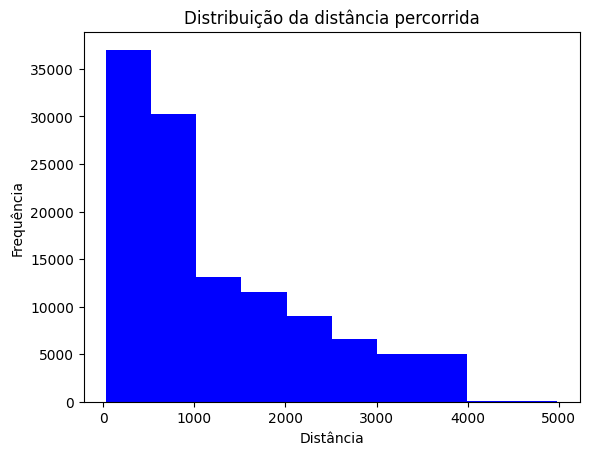

In [122]:
plt.hist(df['Flight Distance'], bins=10, color='blue')

plt.title('Distribuição da distância percorrida')
plt.xlabel('Distância')
plt.ylabel('Frequência')
plt.show()

In [123]:
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 5000]
labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', '2501-3000', '3001-3500', '3501-4000', '4001+']

df['distance_range'] = pd.cut(df['Flight Distance'], bins=bins, labels=labels, right=False)
df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,age_range,distance_range
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,3,4,4,5,5,25,18.0,neutral or dissatisfied,0-18,0-500
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,5,3,1,4,1,1,6.0,neutral or dissatisfied,19-30,0-500
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,5,3,1,4,2,11,9.0,neutral or dissatisfied,19-30,501-1000
5,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,2,1,...,4,4,4,4,1,0,0.0,neutral or dissatisfied,19-30,1001-1500
6,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,2,3,...,3,4,3,5,2,9,23.0,neutral or dissatisfied,46-60,1001-1500


In [124]:
df = df.drop(columns=['Age', 'Flight Distance'])
df.head()

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,age_range,distance_range
0,Male,Loyal Customer,Personal Travel,Eco Plus,3,4,3,1,5,3,...,3,4,4,5,5,25,18.0,neutral or dissatisfied,0-18,0-500
1,Male,disloyal Customer,Business travel,Business,3,2,3,3,1,3,...,5,3,1,4,1,1,6.0,neutral or dissatisfied,19-30,0-500
3,Female,Loyal Customer,Business travel,Business,2,5,5,5,2,2,...,5,3,1,4,2,11,9.0,neutral or dissatisfied,19-30,501-1000
5,Female,Loyal Customer,Personal Travel,Eco,3,4,2,1,1,2,...,4,4,4,4,1,0,0.0,neutral or dissatisfied,19-30,1001-1500
6,Male,Loyal Customer,Personal Travel,Eco,2,4,2,3,2,2,...,3,4,3,5,2,9,23.0,neutral or dissatisfied,46-60,1001-1500


Em seguida, nos voltamos para as colunas do tipo `object`, que devem ser tratadas como variáveis categóricas. </br>


*   Gender: (Female, Male)
*   Customer Type: (Loyal customer, disloyal customer)
*   Class: (Business, Eco, Eco Plus)
*   Type of Travel: (Personal Travel, Business Travel)
*   Satisfaction: (Satisfaction, neutral or dissatisfaction)



Vamos analisar a correlação entre quantidade de tempo de atraso de partida e a satisfação, assim como o atraso de chegada e a satisfação. Uma relação negativa quer dizer que quando um variável tende a aumentar, a outra tende a diminuir.

Para isso, vamos transformar a variável `satisfaction` em variável numérica.

In [125]:
df['satisfaction'] = df['satisfaction'].astype('category')
test_df['satisfaction'] = pd.Categorical(test_df['satisfaction'], categories=df['satisfaction'].cat.categories)
df['satisfaction'] = df['satisfaction'].cat.codes
test_df['satisfaction'] = test_df['satisfaction'].cat.codes

In [126]:
correlation_1 = df['Departure Delay in Minutes'].corr(df['satisfaction'], method='spearman')
print(f"Correlação Spearman para Atraso de Saída: {correlation_1}")
correlation_2 = df['Arrival Delay in Minutes'].corr(df['satisfaction'], method='spearman')
print(f"Correlação Spearman para Atraso de Chegada: {correlation_2}")

Correlação Spearman para Atraso de Saída: -0.06739707085643189
Correlação Spearman para Atraso de Chegada: -0.10265208359015603


Estes valores indicam uma correlação negativa muito fraca entre o atraso de saída e a satisfação. Ou seja, maiores atrasos de saída e chegada estão levemente associados a menores níveis de satisfação, mas a relação é muito fraca.

### Processamento do conjunto de testes

Os mesmos processamentos de dados que foram feitos sobre o conjunto de treinamento foram feitos sobre o conjunto de testes.

In [ ]:
test_df = test_df.drop(columns=['Unnamed: 0', 'id'])

In [129]:
test_df.drop_duplicates()
test_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


In [130]:
test_df.isnull().values.any()

True

In [131]:
test_df = test_df.fillna(method ='pad')
test_df.isnull().values.any()

/var/folders/qs/_360zg2933b7jcgcm4bjkqn00000gq/T/ipykernel_54870/3742967275.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  test_df = test_df.fillna(method ='pad')


False

In [132]:
bins = [0, 18, 30, 45, 60, 100]
age_labels = ['0-18', '19-30', '31-45', '46-60', '61+']

test_df['age_range'] = pd.cut(test_df['Age'], bins=bins, labels=age_labels, right=False)
test_df.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,age_range
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,2,5,5,50,44.0,1,46-60
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,3,4,5,0,0.0,1,31-45
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,4,1,3,2,2,2,0,0.0,0,19-30
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,3,1,4,0,6.0,1,31-45
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,4,2,4,0,20.0,1,46-60


In [133]:
bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 5000]
distance_labels = ['0-500', '501-1000', '1001-1500', '1501-2000', '2001-2500', '2501-3000', '3001-3500', '3501-4000', '4001+']

test_df['distance_range'] = pd.cut(test_df['Flight Distance'], bins=bins, labels=distance_labels, right=False)

In [134]:
test_df = test_df.drop(columns=['Age', 'Flight Distance'])

### Ajuste das variáveis categóricas de ambos os conjuntos

In [135]:
# Ajustando os tipos "object" para tipo "category"
df['Gender'] = df['Gender'].astype('category')
test_df['Gender'] = pd.Categorical(test_df['Gender'], categories=df['Gender'].cat.categories)
df['Gender'] = df['Gender'].cat.codes
test_df['Gender'] = test_df['Gender'].cat.codes

df['Customer Type'] = df['Customer Type'].astype('category')
test_df['Customer Type'] = pd.Categorical(test_df['Customer Type'], categories=df['Customer Type'].cat.categories)
df['Customer Type'] = df['Customer Type'].cat.codes
test_df['Customer Type'] = test_df['Customer Type'].cat.codes

df['Class'] = df['Class'].astype('category')
test_df['Class'] = pd.Categorical(test_df['Class'], categories=df['Class'].cat.categories)
df['Class'] = df['Class'].cat.codes
test_df['Class'] = test_df['Class'].cat.codes

df['Type of Travel'] = df['Type of Travel'].astype('category')
test_df['Type of Travel'] = pd.Categorical(test_df['Type of Travel'], categories=df['Type of Travel'].cat.categories)
df['Type of Travel'] = df['Type of Travel'].cat.codes
test_df['Type of Travel'] = test_df['Type of Travel'].cat.codes

df['age_range'] = df['age_range'].astype('category')
test_df['age_range'] = pd.Categorical(test_df['age_range'], categories=df['age_range'].cat.categories)
df['age_range'] = df['age_range'].cat.codes
test_df['age_range'] = test_df['age_range'].cat.codes

df['distance_range'] = df['distance_range'].astype('category')
test_df['distance_range'] = pd.Categorical(test_df['distance_range'], categories=df['distance_range'].cat.categories)
df['distance_range'] = df['distance_range'].cat.codes
test_df['distance_range'] = test_df['distance_range'].cat.codes
df.head()

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,age_range,distance_range
0,1,0,1,2,3,4,3,1,5,3,...,3,4,4,5,5,25,18.0,0,0,0
1,1,1,0,0,3,2,3,3,1,3,...,5,3,1,4,1,1,6.0,0,1,0
3,0,0,0,0,2,5,5,5,2,2,...,5,3,1,4,2,11,9.0,0,1,1
5,0,0,1,1,3,4,2,1,1,2,...,4,4,4,4,1,0,0.0,0,1,2
6,1,0,1,1,2,4,2,3,2,2,...,3,4,3,5,2,9,23.0,0,3,2


In [136]:
test_df.head()

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,...,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,age_range,distance_range
0,0,0,0,1,5,4,3,4,3,4,...,5,5,2,5,5,50,44.0,1,3,0
1,0,0,0,0,1,1,3,1,5,4,...,4,4,3,4,5,0,0.0,1,2,5
2,1,1,0,1,2,0,2,4,2,2,...,1,3,2,2,2,0,0.0,0,1,0
3,1,0,0,0,0,0,0,2,3,4,...,1,1,3,1,4,0,6.0,1,2,6
4,0,0,0,1,2,3,4,3,4,1,...,2,2,4,2,4,0,20.0,1,3,2


Para cada coluna categórica ('Gender', 'Customer Type', 'Class', 'Type of Travel', 'age_range', 'distance_range'), realizamos o seguinte procedimento:

- Convertemos a coluna para o tipo 'category'.
- Garantimos que a coluna do conjunto de dados de teste tenha as mesmas categorias do conjunto de treino.
- Transformamos as categorias em códigos numéricos.

## Treinamento das redes
A tarefa que buscamos realizar com os modelos abaixo é a de classificação de satisfação dos passageiros de linhas aéreas. </br>
Os testes necessários para cada modelo são os seguintes:
* Teste estatístico Kolmogorov-Smirnov -KS (principal)
* MSE (erro médio quadrado)
* Matriz de confusão
* Auroc (Área sob a Curva Roc)
* Acurácia, Recall, Precision e F-Measure

In [138]:
# Para treinamento e validação
train_ratio = 0.80

X_train, X_valid, y_train, y_valid = train_test_split(df.drop('satisfaction', axis=1), df['satisfaction'], train_size=train_ratio, random_state=1)

In [139]:
# Para teste
X_test, y_test = test_df.drop('satisfaction', axis=1), test_df['satisfaction']

### MLP

In [140]:
mlp = MLPClassifier(max_iter=300, solver='adam', random_state=1)

max_iter=300:
Este parâmetro define o número máximo de iterações que o algoritmo de treinamento irá executar. Se a convergência for alcançada antes, o treinamento será interrompido.

solver='adam':
O parâmetro solver define o algoritmo utilizado para otimizar os pesos da rede neural. O 'adam' é um algoritmo de otimização eficiente que combina as vantagens dos métodos AdaGrad e RMSProp.

random_state=1:
Este parâmetro define o estado inicial do gerador de números aleatórios usado para inicializar os pesos da rede. Definir o random_state garante que os resultados sejam reproduzíveis: cada vez que o código é executado, ele produz os mesmos resultados.

In [141]:
mlp.fit(X_train, y_train)

MLPClassifier(max_iter=300, random_state=1)

In [142]:
y_pred_valid = mlp.predict(X_valid)
y_pred_test = mlp.predict(X_test)


print("Validação:")
print(classification_report(y_valid, y_pred_valid))
cm_valid = confusion_matrix(y_valid, y_pred_valid)

print("\nTeste:")
print(classification_report(y_test, y_pred_test))
cm_test = confusion_matrix(y_test, y_pred_test)

Validação:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96     11850
           1       0.98      0.93      0.95     11702

    accuracy                           0.95     23552
   macro avg       0.96      0.95      0.95     23552
weighted avg       0.96      0.95      0.95     23552


Teste:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96     14573
           1       0.97      0.93      0.95     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.95      0.95     25976
weighted avg       0.96      0.96      0.96     25976



- Precision (Precisão): Proporção de verdadeiros positivos entre os exemplos classificados como positivos.
- Recall: Proporção de verdadeiros positivos entre todos os exemplos que são realmente positivos.
- F1-score: Média harmônica da precisão e da revocação.
- Support: Número de ocorrências de cada classe no conjunto de validação.

As métricas de precisão, revocação e F1-score são bastante consistentes entre os conjuntos de validação e teste, indicando que o modelo não tem overfitting e generaliza bem para novos dados.

A acurácia é de 0.95 no conjunto de validação e 0.96 no conjunto de teste.

A classe 1 tem recall um pouco menor do que a classe 0, o que pode indicar que há mais falsos negativos para a classe 1.


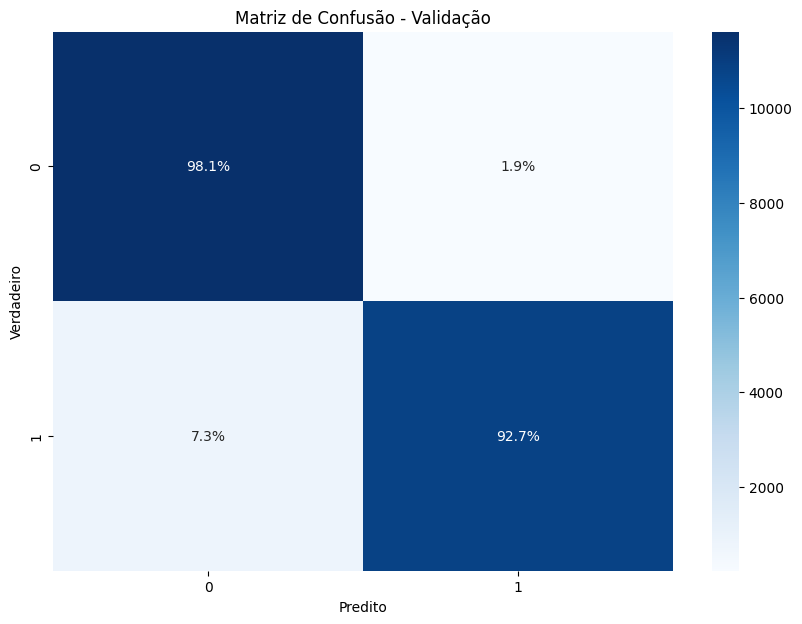

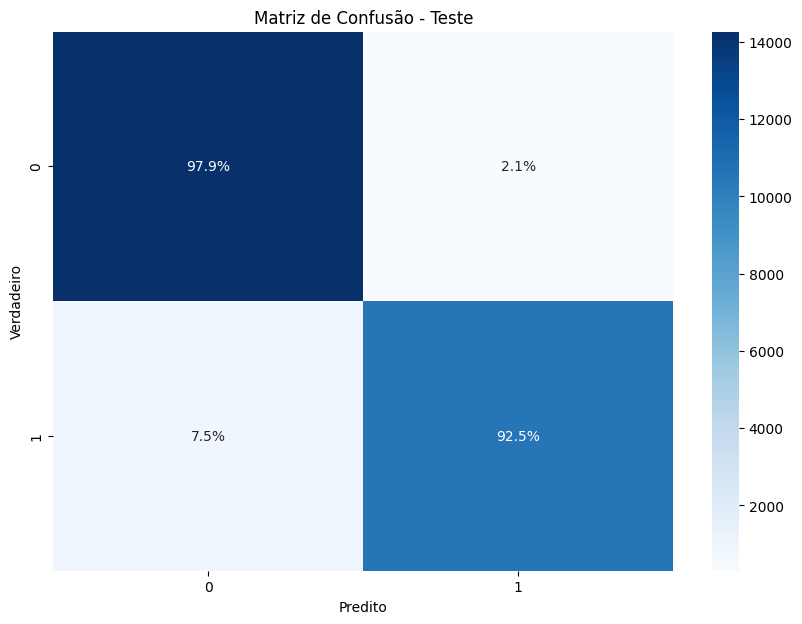

In [144]:
conf_matrix_percent = cm_valid / cm_valid.sum(axis=1, keepdims=True) * 100
annot_labels = [['{:.1f}%'.format(value) for value in row] for row in conf_matrix_percent]

plt.figure(figsize=(10, 7))
sns.heatmap(cm_valid, annot=annot_labels, fmt='', cmap='Blues')
plt.title('Matriz de Confusão - Validação')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()


conf_matrix_percent = cm_test / cm_test.sum(axis=1, keepdims=True) * 100
annot_labels = [['{:.1f}%'.format(value) for value in row] for row in conf_matrix_percent]

plt.figure(figsize=(10, 7))
sns.heatmap(cm_test, annot=annot_labels, fmt='', cmap='Blues')
plt.title('Matriz de Confusão - Teste')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

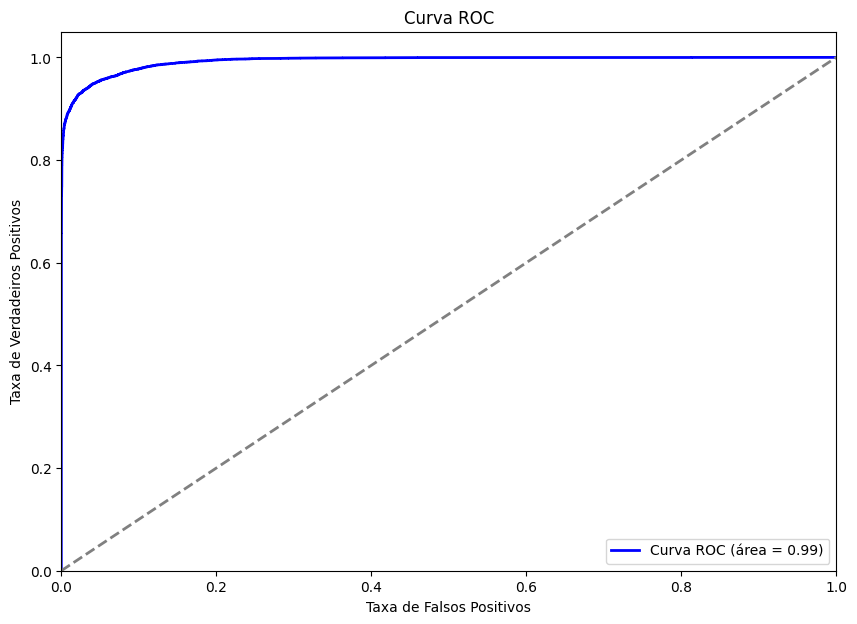

In [145]:
y_score = mlp.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plotando a curva ROC
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (área = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

A curva azul está muito próxima do eixo Y e da parte superior do gráfico, indicando uma baixa taxa de falsos positivos e uma alta taxa de verdadeiros positivos, sinal de que a MLP comete poucos erros ao classificar as amostras.

In [146]:
mean_squared_error(y_test, y_pred_test)

0.04469510317215892

O Mean Squared Error é uma métrica utilizada para avaliar a qualidade das previsões de um modelo, especialmente em tarefas de regressão. Ele mede a diferença entre os valores previstos pelo modelo e os valores reais.

Esse valor sugere que a MLP está fazendo boas previsões

In [147]:
prob_pos = mlp.predict_proba(X_test)[:, 1]

# Split probabilities into positive and negative classes based on true labels
pos_scores = prob_pos[y_test == 1]
neg_scores = prob_pos[y_test == 0]

In [148]:
ks_statistic, p_value = ks_2samp(pos_scores, neg_scores)

print(f"KS Statistic: {ks_statistic}")
print(f"P-value: {p_value}")

KS Statistic: 0.907922031711466
P-value: 0.0


A estatística KS de 0.9079 indica uma grande diferença entre as distribuições das pontuações positivas e negativas, mostrando que o modelo pode distinguir bem entre as classes. O p-valor de 0.0 indica que essa diferença é altamente significativa.

In [149]:
ks_stat_valid, ks_p_value_valid = ks_2samp(y_valid, y_pred_valid)
ks_stat_test, ks_p_value_test = ks_2samp(y_test, y_pred_test)

print(f'Teste KS (validação) - Estatística: {ks_stat_valid}, P-valor: {ks_p_value_valid}')
print(f'Teste KS (teste) - Estatística: {ks_stat_test}, P-valor: {ks_p_value_test}')

Teste KS (validação) - Estatística: 0.026282269021739135, P-valor: 1.6867472970235653e-07
Teste KS (teste) - Estatística: 0.02090391130274105, P-valor: 2.3173002242808868e-05


O KS para o conjunto de validação e teste é bastante baixo, sugerindo que as distribuições das predições do modelo e dos valores reais são muito semelhantes.

O p-valor extremamente baixo indica que a diferença é estatisticamente significativa (não acontece por acaso).

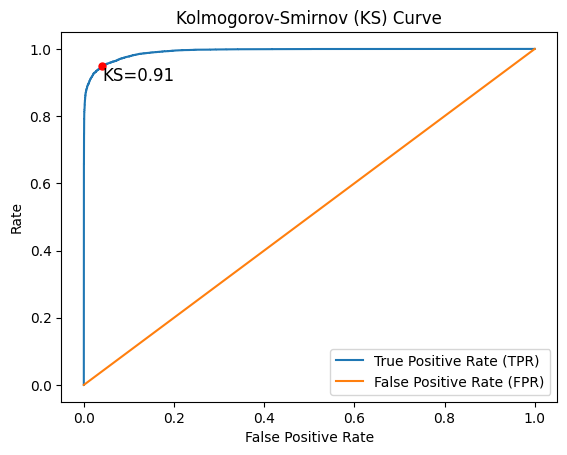

KS Statistic: 0.91


In [150]:
ks_statistic = np.max(tpr - fpr)
ks_idx = np.argmax(tpr - fpr)
plt.figure()
plt.plot(fpr, tpr, label='True Positive Rate (TPR)')
plt.plot(fpr, fpr, label='False Positive Rate (FPR)')
plt.plot([fpr[ks_idx]], [tpr[ks_idx]], marker='o', markersize=5, color="red")
plt.text(fpr[ks_idx], tpr[ks_idx], f'KS={ks_statistic:.2f}', fontsize=12, verticalalignment='top')
plt.xlabel('False Positive Rate')
plt.ylabel('Rate')
plt.title('Kolmogorov-Smirnov (KS) Curve')
plt.legend(loc='best')
plt.show()

print(f"KS Statistic: {ks_statistic:.2f}")

### Random forest

In [151]:
params_random_forest = {
    'n_estimators': [10, 100],
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [1, 3, 5]
}

random_forest = GridSearchCV(RandomForestClassifier(random_state=0), params_random_forest, cv=3, scoring='accuracy')
random_forest.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [1, 3, 5], 'n_estimators': [10, 100]},
             scoring='accuracy')

In [152]:
best_random_forest = random_forest.best_estimator_

In [153]:
y_pred_test_rf = random_forest.predict(X_test)

In [154]:
best_random_forest.score(X_test, y_test)

0.921735448105944

In [155]:
print(classification_report(y_test, y_pred_test_rf))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93     14573
           1       0.91      0.92      0.91     11403

    accuracy                           0.92     25976
   macro avg       0.92      0.92      0.92     25976
weighted avg       0.92      0.92      0.92     25976



As métricas de precisão, revocação e F1-score é consistente no conjunto de teste, indicando que o modelo não tem overfitting e generaliza bem para novos dados.

A acurácia é de 0.92.

A classe 1 tem recall um pouco menor do que a classe 0, o que pode indicar que há mais falsos negativos para a classe 1.


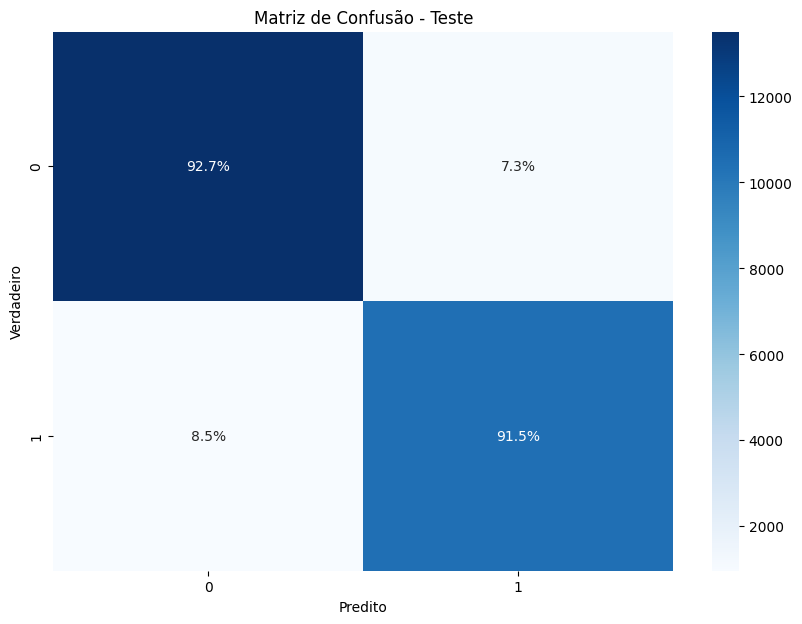

In [156]:
cm_test_rf = confusion_matrix(y_test, y_pred_test_rf)

conf_matrix_percent = cm_test_rf / cm_test_rf.sum(axis=1, keepdims=True) * 100
annot_labels = [['{:.1f}%'.format(value) for value in row] for row in conf_matrix_percent]

plt.figure(figsize=(10, 7))
sns.heatmap(cm_test_rf, annot=annot_labels, fmt='', cmap='Blues')
plt.title('Matriz de Confusão - Teste')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

In [157]:
# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_rf)
roc_auc = auc(fpr, tpr)

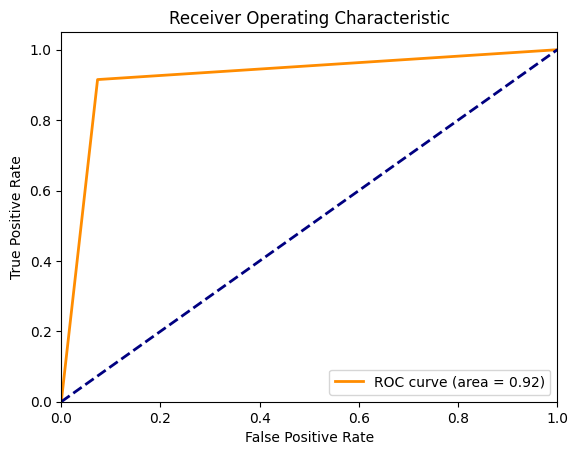

In [158]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

A curva também está muito próxima do eixo Y e da parte superior do gráfico, indicando uma baixa taxa de falsos positivos e uma alta taxa de verdadeiros positivos, indicando que o modelo comete poucos erros ao classificar as amostras.

In [159]:
mean_squared_error(y_test, y_pred_test_rf)

0.07826455189405605

Comparado ao MSE da MLP (0.0447), o MSE da Random Forest é um pouco maior, mas ainda é um valor relativamente baixo.

<AxesSubplot: >

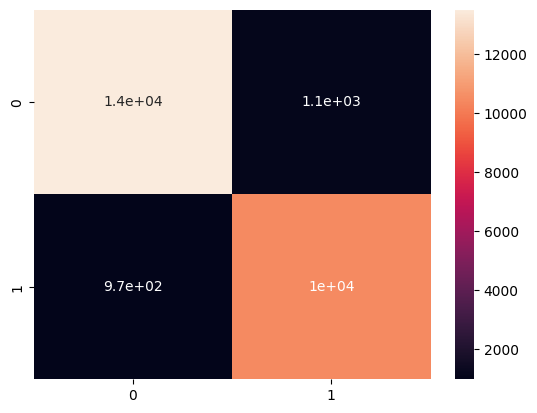

In [160]:
sns.heatmap(confusion_matrix(y_test, y_pred_test_rf), annot=True)

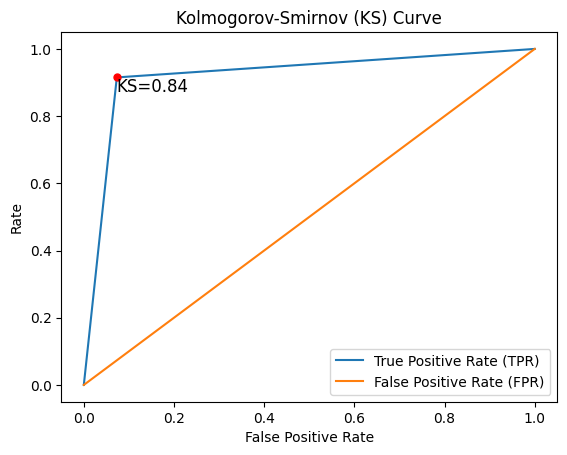

KS Statistic: 0.84


In [161]:
ks_statistic = np.max(tpr - fpr)
ks_idx = np.argmax(tpr - fpr)
plt.figure()
plt.plot(fpr, tpr, label='True Positive Rate (TPR)')
plt.plot(fpr, fpr, label='False Positive Rate (FPR)')
plt.plot([fpr[ks_idx]], [tpr[ks_idx]], marker='o', markersize=5, color="red")
plt.text(fpr[ks_idx], tpr[ks_idx], f'KS={ks_statistic:.2f}', fontsize=12, verticalalignment='top')
plt.xlabel('False Positive Rate')
plt.ylabel('Rate')
plt.title('Kolmogorov-Smirnov (KS) Curve')
plt.legend(loc='best')
plt.show()

print(f"KS Statistic: {ks_statistic:.2f}")

O teste KS para a Random Forest teve uma estatística de 0.84. Isso mostra que o modelo é eficiente em separar as classes positivas e negativas, embora a MLP tenha uma ligeira vantagem.

### KAN

In [64]:
train_input = torch.tensor(X_train.values, dtype=torch.float32)
train_label = torch.tensor(y_train.values, dtype=torch.long)

valid_input = torch.tensor(X_valid.values, dtype=torch.float32)
valid_label = torch.tensor(y_valid.values, dtype=torch.long)

dataset = {
    'train_input': train_input,
    'train_label': train_label,
    'test_input': valid_input,
    'test_label': valid_label
}

Modelo Kan

In [65]:
model = KAN(width=[X_train.shape[1], 2], grid=3, k=3)

In [66]:
def train_acc():
    return torch.mean((torch.argmax(model(dataset['train_input']), dim=1) == dataset['train_label']).float())

def test_acc():
    return torch.mean((torch.argmax(model(dataset['test_input']), dim=1) == dataset['test_label']).float())

In [69]:
results = model.train(dataset, steps=20, metrics=(train_acc, test_acc), loss_fn=torch.nn.CrossEntropyLoss())

train loss: 4.40e-01 | test loss: 4.42e-01 | reg: 1.79e+01 : 100%|██| 20/20 [05:26<00:00, 16.33s/it]


Esses valores indicam que o modelo não está sofrendo de overfitting, pois são valores próximos.

A regularização (reg) adiciona uma penalização à função de perda para evitar overfitting.
Um termo de regularização de 17.9 é relativamente alto, indicando que o modelo está sendo penalizado significativamente para manter os pesos baixos e a complexidade do modelo sob controle.

description:   0%|                                                           | 0/20 [06:35<?, ?it/s]


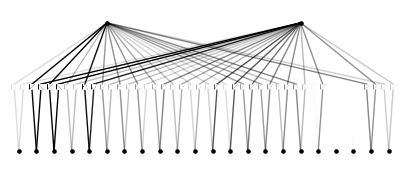

In [70]:
model.plot()

Os pontos sem conexões na camada inferior da rede KAN podem ser interpretados como neurônios não utilizados ou desativados devido a várias razões. Esses pontos podem resultar de um treinamento onde esses neurônios não contribuíram para a representação dos dados.

In [71]:
# Obter a acurácia final
final_train_acc = results['train_acc'][-1]
final_test_acc = results['test_acc'][-1]

print(f"Acurácia final no conjunto de treino: {final_train_acc:.4f}")
print(f"Acurácia final no conjunto de teste: {final_test_acc:.4f}")

Acurácia final no conjunto de treino: 0.9265
Acurácia final no conjunto de teste: 0.9268


A acurácia foi alta, semelhante aos outros dois modelos feitos

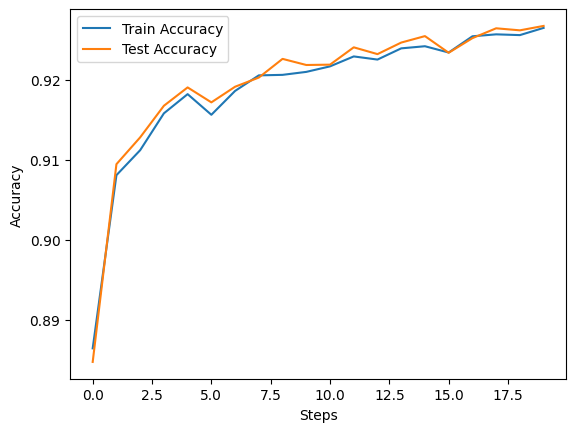

In [72]:
# Plotar os resultados de acurácia
plt.plot(results['train_acc'], label='Train Accuracy')
plt.plot(results['test_acc'], label='Test Accuracy')
plt.xlabel('Steps')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

A consistência entre as curvas de treino e teste é um boa, indica que o modelo não está sofrendo de overfitting nos dados de treino, pois o desempenho no conjunto de teste é semelhante ao do conjunto de treino.

In [163]:
# Calcular o MSE

test_outputs = model(dataset['test_input'])
test_predictions = torch.argmax(test_outputs, dim=1).numpy()

mse = mean_squared_error(y_valid, test_predictions)
print(f"MSE: {mse}")

MSE: 0.0732421875


Valor parecido ao modelo Random Forest e MLP, o valor do MLP continua sendo o mais baixo.

In [164]:
# Calcular o Recall para o conjunto de validação
test_recall = recall_score(y_valid, test_predictions)
print("Test Recall:", test_recall)

Test Recall: 0.9216373269526577


In [166]:
# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_valid, test_predictions)
roc_auc = auc(fpr, tpr)

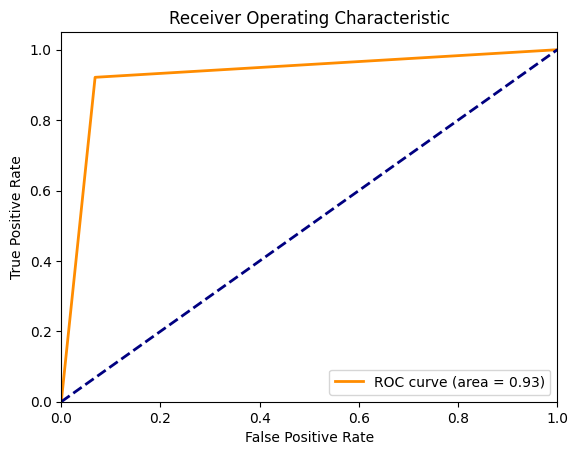

In [167]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

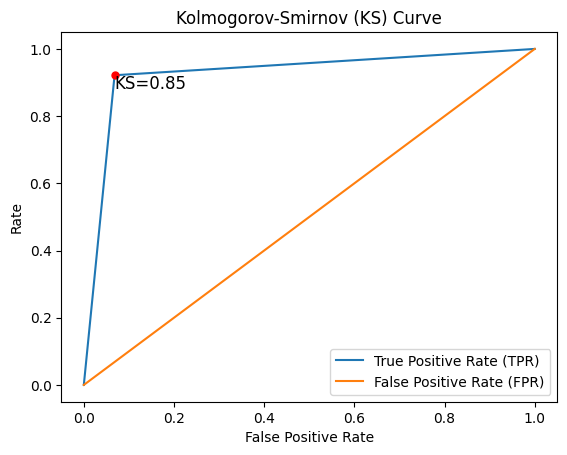

KS Statistic: 0.85


In [168]:
ks_statistic = np.max(tpr - fpr)
ks_idx = np.argmax(tpr - fpr)
plt.figure()
plt.plot(fpr, tpr, label='True Positive Rate (TPR)')
plt.plot(fpr, fpr, label='False Positive Rate (FPR)')
plt.plot([fpr[ks_idx]], [tpr[ks_idx]], marker='o', markersize=5, color="red")
plt.text(fpr[ks_idx], tpr[ks_idx], f'KS={ks_statistic:.2f}', fontsize=12, verticalalignment='top')
plt.xlabel('False Positive Rate')
plt.ylabel('Rate')
plt.title('Kolmogorov-Smirnov (KS) Curve')
plt.legend(loc='best')
plt.show()

print(f"KS Statistic: {ks_statistic:.2f}")

Os resultados foram altos, mas a MLP ainda se mostrou com resultados melhores.

### Gradient boosting

In [169]:
params_gradient_boosting = {
    'n_estimators': [10, 100],
    'learning_rate': [0.1, 1.0],
    'max_depth': [1, 3]
}

gradient_boosting = GridSearchCV(GradientBoostingClassifier(random_state=0), params_gradient_boosting, cv=3, scoring='accuracy')
gradient_boosting.fit(X_train, y_train)

best_gradient_boosting = gradient_boosting.best_estimator_

In [170]:
y_pred_test_ensemble = best_gradient_boosting.predict(X_test)

In [ ]:
best_gradient_boosting.score(X_test, y_test)

0.9574992300585156

Agora iremos gerar as métricas de avaliação do grandient boosting treinado

In [171]:
# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_ensemble)
roc_auc = auc(fpr, tpr)

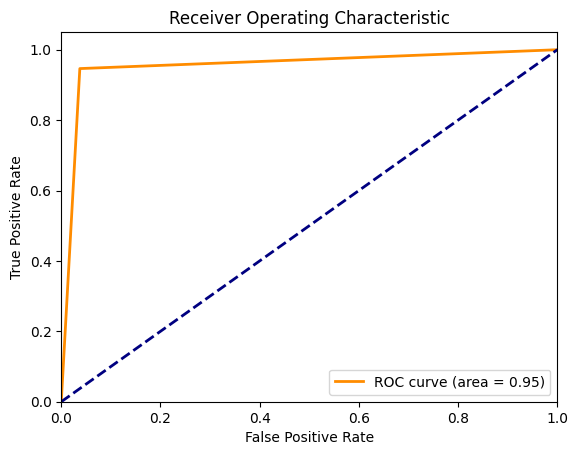

In [172]:
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [173]:
print(classification_report(y_test, y_pred_test_ensemble))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96     14573
           1       0.95      0.95      0.95     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.95      0.95     25976
weighted avg       0.96      0.96      0.96     25976



A métrica de mean squared error (MSE) para o modelo de grandient boosting está bem próxima a zero, o que significa que o erro o nosso modelo com relação as suas previsões é baixo.

In [174]:
mean_squared_error(y_test, y_pred_test_ensemble)

0.04450261780104712

<AxesSubplot: >

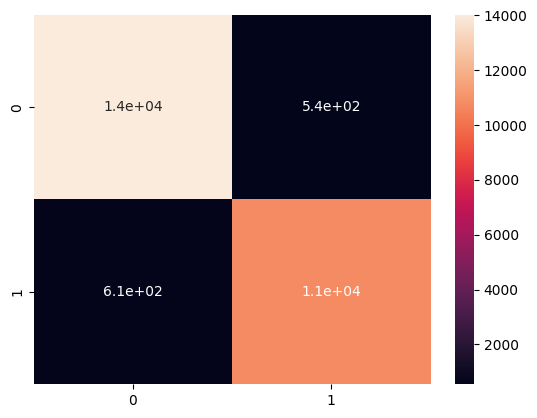

In [175]:
sns.heatmap(confusion_matrix(y_test, y_pred_test_ensemble), annot=True)

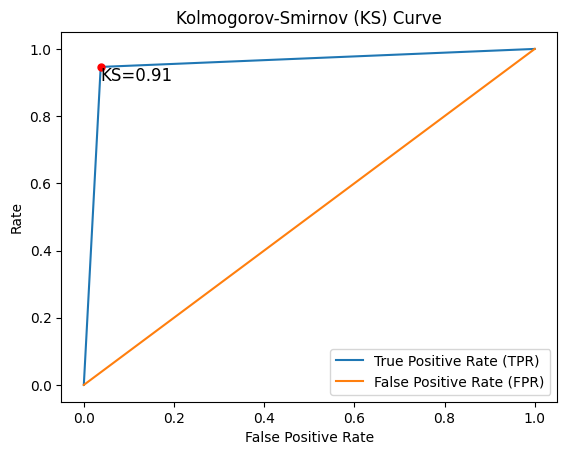

KS Statistic: 0.91


In [176]:
ks_statistic = np.max(tpr - fpr)
ks_idx = np.argmax(tpr - fpr)
plt.figure()
plt.plot(fpr, tpr, label='True Positive Rate (TPR)')
plt.plot(fpr, fpr, label='False Positive Rate (FPR)')
plt.plot([fpr[ks_idx]], [tpr[ks_idx]], marker='o', markersize=5, color="red")
plt.text(fpr[ks_idx], tpr[ks_idx], f'KS={ks_statistic:.2f}', fontsize=12, verticalalignment='top')
plt.xlabel('False Positive Rate')
plt.ylabel('Rate')
plt.title('Kolmogorov-Smirnov (KS) Curve')
plt.legend(loc='best')
plt.show()

print(f"KS Statistic: {ks_statistic:.2f}")

## Conclusões

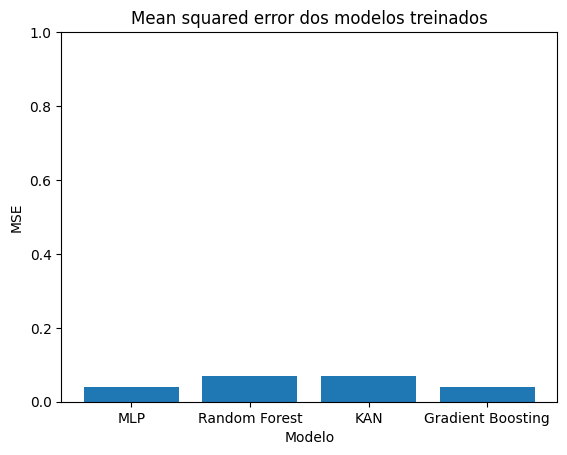

In [177]:
x = ["MLP", "Random Forest", "KAN", "Gradient Boosting"]
y = [0.04, 0.07, 0.07, 0.04]

plt.bar(x, y)
plt.ylim(0.0, 1.0)
plt.xlabel("Modelo")
plt.ylabel("MSE")
plt.title("Mean squared error dos modelos treinados")
plt.show()

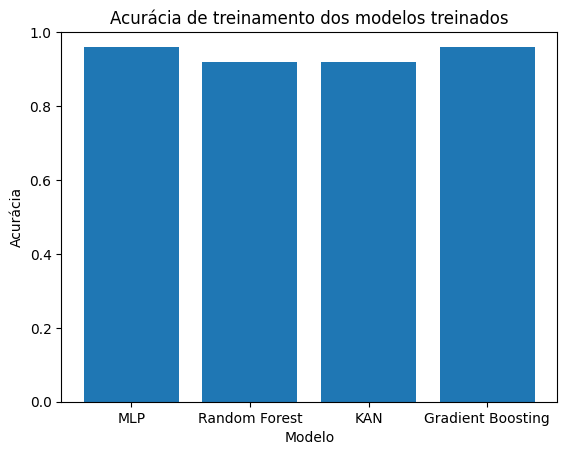

In [178]:
x = ["MLP", "Random Forest", "KAN", "Gradient Boosting"]
y = [0.96, 0.92, 0.92, 0.96]

plt.bar(x, y)
plt.ylim(0.0, 1.0)
plt.xlabel("Modelo")
plt.ylabel("Acurácia")
plt.title("Acurácia de treinamento dos modelos treinados")
plt.show()

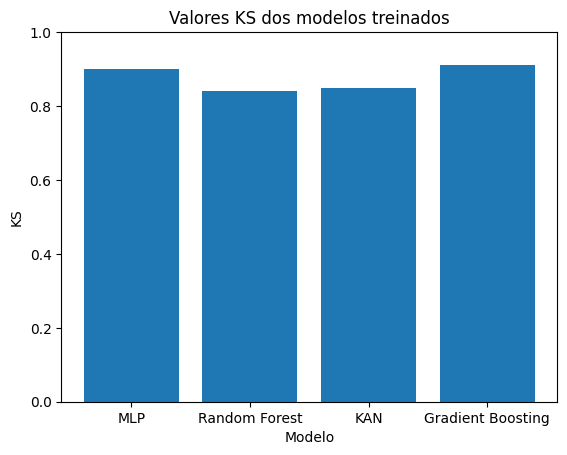

In [179]:
x = ["MLP", "Random Forest", "KAN", "Gradient Boosting"]
y = [0.90, 0.84, 0.85, 0.91]

plt.bar(x, y)
plt.ylim(0.0, 1.0)
plt.xlabel("Modelo")
plt.ylabel("KS")
plt.title("Valores KS dos modelos treinados")
plt.show()

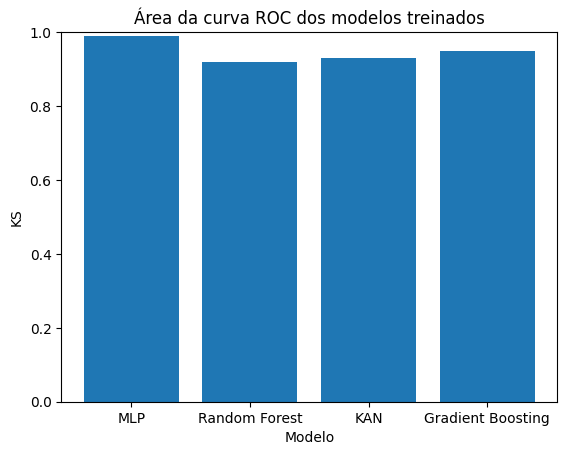

In [180]:
x = ["MLP", "Random Forest", "KAN", "Gradient Boosting"]
y = [0.99, 0.92, 0.93, 0.95]

plt.bar(x, y)
plt.ylim(0.0, 1.0)
plt.xlabel("Modelo")
plt.ylabel("KS")
plt.title("Área da curva ROC dos modelos treinados")
plt.show()

Os resultados indicam que os modelos MLP e Gradient Boosting apresentaram o melhor desempenho geral em termos de MSE e precisão, ambos com um MSE de 0.04 e precisão de 0.96. No entanto, ao analisar o teste KS, o modelo Gradient Boosting obteve a maior pontuação (0.91), sugerindo um melhor ajuste às distribuições dos dados.

O modelo Gradient Boosting se destacou como o melhor classificador para o dataset de satisfação em viagens, oferecendo o menor erro quadrático médio, alta precisão e a melhor adequação às distribuições dos dados, conforme indicado pelo teste KS. 

O modelo MLP também apresentou um resultado bom e pode ser considerado uma alternativa viável, especialmente se considerar a velocidade de implementação e, como ele foi melhor em relação a AUC também é a melhor escolha se a capacidade de discriminação for a prioridade.